<a href="https://colab.research.google.com/github/yiwenwangANU/Machine_Learning/blob/main/10_Time_series_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import modules

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Download dataset

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-06-18 01:54:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2022-06-18 01:54:22 (5.97 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



#Explore the data

In [3]:
import pandas as pd

raw_df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv')
raw_df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2782,BTC,2021-05-14,49764.132082,49596.778891,51448.798576,46294.720180
2783,BTC,2021-05-15,50032.693137,49717.354353,51578.312545,48944.346536
2784,BTC,2021-05-16,47885.625255,49926.035067,50690.802950,47005.102292
2785,BTC,2021-05-17,45604.615754,46805.537852,49670.414174,43868.638969


In [4]:
data_df = raw_df[{'Date', 'Closing Price (USD)'}]
data_df

,Date,Closing Price (USD)
0,2013-10-01,123.654990
1,2013-10-02,125.455000
2,2013-10-03,108.584830
3,2013-10-04,118.674660
4,2013-10-05,121.338660
...,...,...
2782,2021-05-14,49764.132082
2783,2021-05-15,50032.693137
2784,2021-05-16,47885.625255
2785,2021-05-17,45604.615754


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.7+ KB


#Preprocess the data

In [6]:
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2787 non-null   datetime64[ns]
 1   Closing Price (USD)  2787 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.7 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
data_df = data_df.set_index('Date')

In [8]:
data_df

,Closing Price (USD)
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


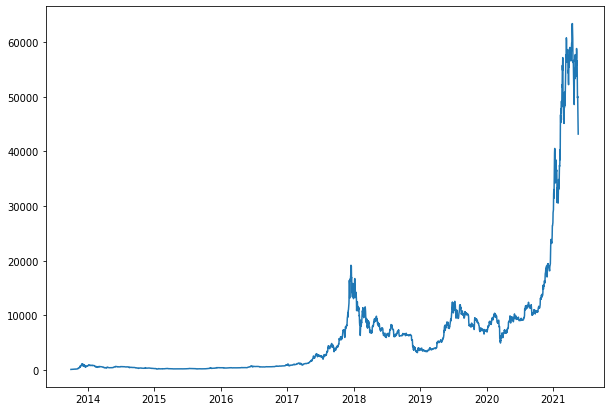

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(data_df['Closing Price (USD)'])

In [10]:
date_list = data_df.index.to_numpy()
price_list = data_df['Closing Price (USD)'].to_numpy()

#Seperate the training and test set

In [11]:
X_train = date_list[:int(0.8*(len(date_list)))]
y_train = price_list[:int(0.8*(len(price_list)))]

X_test = date_list[int(0.8*(len(date_list))):]
y_test = price_list[int(0.8*(len(price_list))):]

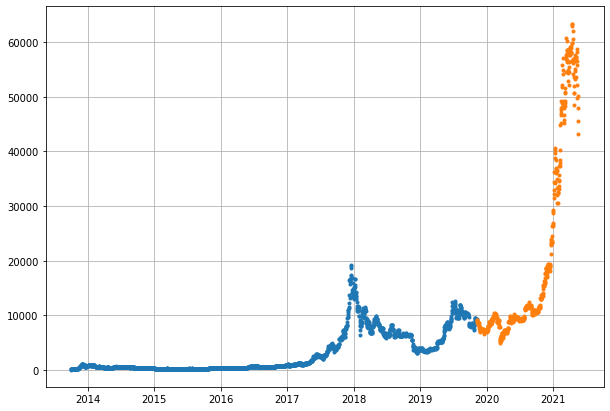

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(X_train, y_train, '.')
plt.plot(X_test, y_test, '.')
plt.grid('True')

#Create plot helper function

In [13]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end],
           values[start:end],
           format,
           label=label)
  
  if label != None:
    plt.legend(prop={'size': 15})
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  plt.grid(True)

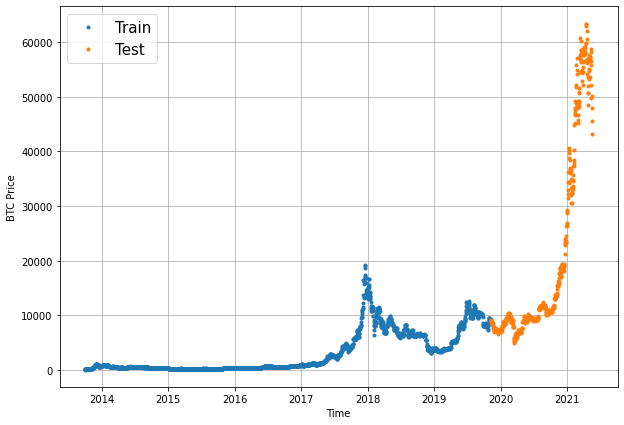

In [14]:
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label='Train')
plot_time_series(X_test, y_test, label='Test')

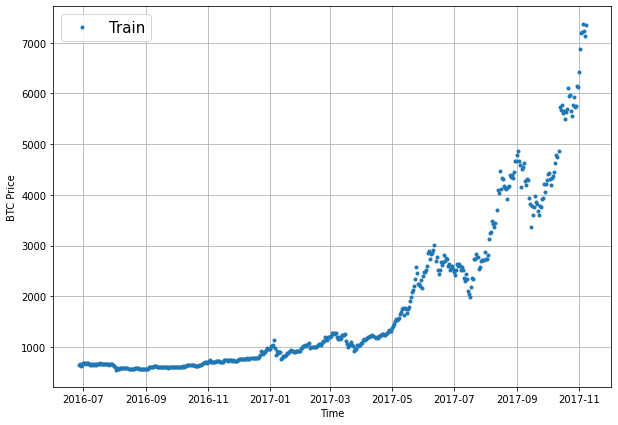

In [15]:
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, start=1000, end=1500, label='Train')

#Model 0: Naïve forecast (baseline)

In [ ]:
naive_forcast = y_test[:-1] 

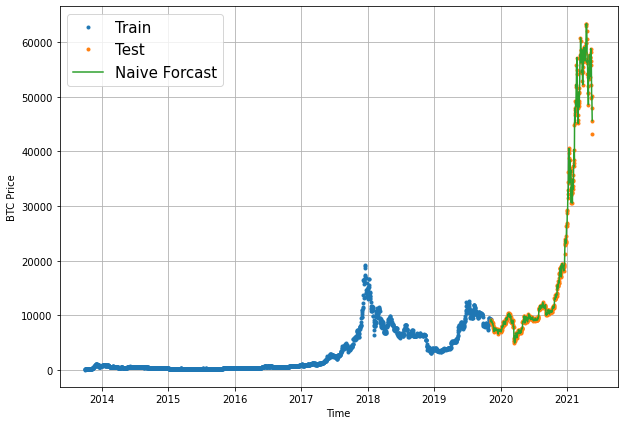

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, format='.', label='Train')
plot_time_series(X_test, y_test, format='.', label='Test')
plot_time_series(X_test[1:], naive_forcast, format='-', label='Naive Forcast')

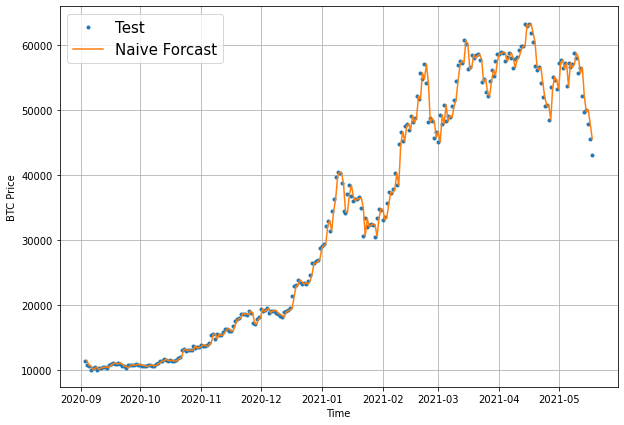

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test, y_test, start=offset, format='.', label='Test')
plot_time_series(X_test[1:], naive_forcast, start=offset, format='-', label='Naive Forcast')

#Create evaluation metrics

In [16]:
import tensorflow as tf

def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.cast(y_pred, tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mae_naive_no_season = tf.keras.metrics.mean_absolute_error(y_true[1:], y_true[:-1])
  mase = tf.reduce_mean(mae) / tf.reduce_mean(mae_naive_no_season)

  if(y_pred.ndim > 0):
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.sqrt(mse)
    mape = tf.reduce_mean(mape)
    
  return {'mae': mae.numpy(), 'mse': mse.numpy(), 'rmse': rmse.numpy(), 
          'mape': mape.numpy(), 'mase': mase.numpy()}

In [17]:
# Evaluate the prediction of model 0
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=y_test[:-1])
naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

#Model 1: Dense model (window = 7, horizon = 1)

##Create new windowing dataset

In [18]:
import numpy as np
tf.random.set_seed(42)

In [19]:
def make_windows(input_list, window_size, horizon):
  index_x = np.arange(window_size+horizon)
  index_y = np.arange(len(input_list)-(window_size+horizon)+1)[:, np.newaxis]
  output = input_list[index_x + index_y]
  return output[:, :-horizon], output[:, -horizon:]

#make_windows_index(np.arange(101, 120))

In [20]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [21]:
WIN_SIZE = 7
HORIZON = 1

In [22]:
full_windows, full_labels = make_windows(price_list, window_size=WIN_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [23]:
train_windows.shape, train_labels.shape

((2224, 7), (2224, 1))

In [24]:
# def make_windows_tf(input_list, window_size, horizon):
#   input_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
#       data = input_list[:-horizon],
#       targets = None,
#       sequence_length=window_size,
#       batch_size=128)
#   target_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
#       data = input_list[window_size:],
#       targets = None,
#       sequence_length=horizon,
#       batch_size=128)
#   dataset = tf.data.Dataset.zip((input_dataset, target_dataset))
#   return dataset

In [25]:
# train_ds = make_windows_tf(y_train, WIN_SIZE, HORIZON).shuffle(buffer_size=10000).prefetch(tf.data.AUTOTUNE)
# test_ds = make_windows_tf(y_test, WIN_SIZE, HORIZON)

In [26]:
# it = iter(train_ds)
# it.next()

##Create model checkpoint callbacks

In [27]:
import os

In [28]:
def create_model_checkpoint(model_name, save_path="model_checkpoints"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), 
                                            verbose=0, 
                                            save_weights_only=True,
                                            save_best_only=True) 

In [29]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(WIN_SIZE,), dtype=tf.float64)
x = layers.Dense(128, activation='relu')(inputs)
outputs = layers.Dense(HORIZON)(x)

model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

##Fit model_1

In [30]:
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

In [ ]:
history_1 = model_1.fit(train_windows,
                        train_labels,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_1.name)])

In [32]:
# history_1 = model_1.fit(train_ds,
#                         epochs=100,
#                         validation_data=test_ds,
#                         callbacks=[create_model_checkpoint(model_name=model_1.name)])

In [33]:
model_1.load_weights("model_checkpoints/model_1_dense")
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.5499 - mae: 568.5499 - mse: 1172587.7500


[568.5498657226562, 568.5498657226562, 1172587.75]

In [34]:
test_labels = tf.cast(test_labels, tf.float32)
test_labels = tf.squeeze(test_labels)

y_pred_1 = model_1.predict(test_windows)
y_pred_1 = tf.squeeze(y_pred_1)

In [35]:
model_1_results = evaluate_preds(y_true = test_labels,
                                 y_pred = y_pred_1)

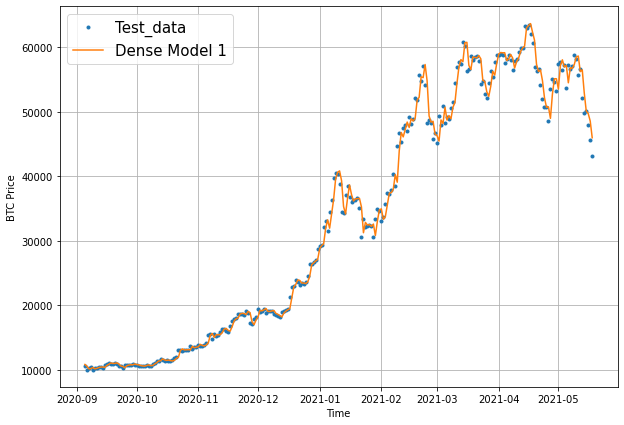

In [38]:
offset = 300
plt.figure(figsize=(10, 7))
#plot_time_series(X_test, y_test, start=offset, format='.', label='Test')
plot_time_series(X_test[-len(test_labels):], test_labels, start=offset, label="Test_data")
plot_time_series(X_test[-len(test_labels):], y_pred_1, start=offset, format='-', label='Dense Model 1')

In [39]:
test_labels.shape, y_pred_1.shape

(TensorShape([556]), TensorShape([556]))

#Model 2: Dense model (window = 30, horizon = 1)

In [ ]:
WIN_SIZE = 30
HORIZON = 1

In [ ]:
full_windows, full_labels = make_windows(price_list, window_size=WIN_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(WIN_SIZE,), dtype=tf.float64)
x = layers.Dense(128, activation='relu')(inputs)
outputs = layers.Dense(HORIZON)(x)

model_2 = tf.keras.Model(inputs, outputs, name='model_2_dense')

In [ ]:
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

In [ ]:
history_2 = model_2.fit(train_windows,
                        train_labels,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
model_2.load_weights("model_checkpoints/model_2_dense")
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 591.4724 - mae: 591.4724 - mse: 1202957.1250


[591.4723510742188, 591.4723510742188, 1202957.125]

In [ ]:
test_labels = tf.cast(test_labels, tf.float32)
test_labels = tf.squeeze(test_labels)

y_pred_2 = model_2.predict(test_windows)
y_pred_2 = tf.squeeze(y_pred_2)

In [ ]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = tf.squeeze(y_pred_2))

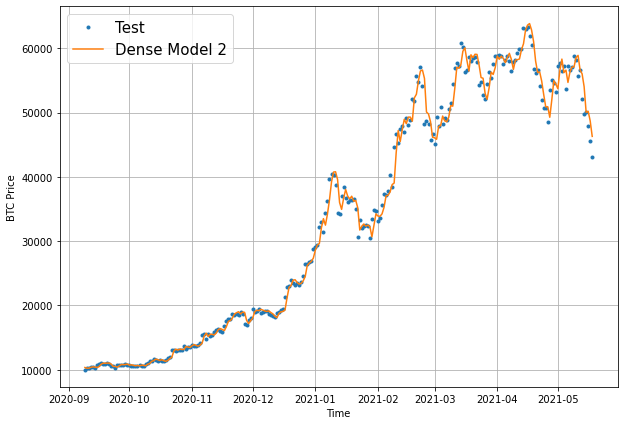

In [ ]:
offsoffset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_labels):], test_labels, start=offset, format='.', label='Test')
plot_time_series(X_test[-len(test_labels):], y_pred_2, start=offset, format='-', label='Dense Model 2')

#Model 3: Dense model (window = 30, horizon = 7)

In [ ]:
WIN_SIZE = 30
HORIZON = 7

In [ ]:
full_windows, full_labels = make_windows(price_list, window_size=WIN_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(WIN_SIZE,), dtype=tf.float64)
x = layers.Dense(128, activation='relu')(inputs)
outputs = layers.Dense(HORIZON)(x)

model_3 = tf.keras.Model(inputs, outputs, name='model_3_dense')

In [ ]:
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

In [ ]:
history_3 = model_3.fit(train_windows,
                        train_labels,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.load_weights("model_checkpoints/model_3_dense")
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1247.9972 - mae: 1247.9972 - mse: 5503063.0000


[1247.9971923828125, 1247.9971923828125, 5503063.0]

In [ ]:
y_pred_3 = model_3.predict(test_windows)
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels), 
                                 y_pred = tf.squeeze(y_pred_3))

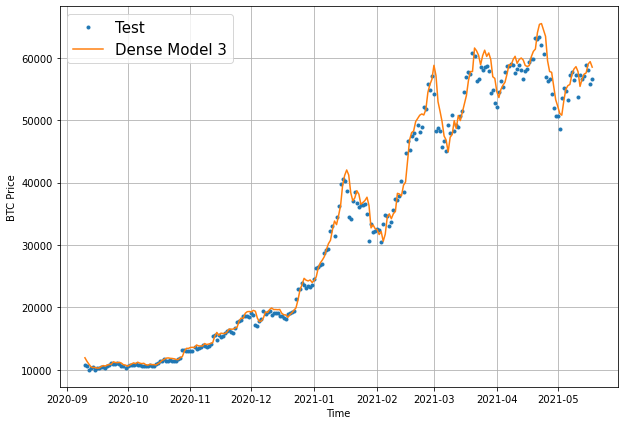

In [ ]:
offsoffset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_labels):], test_labels[:, 0], start=offset, format='.', label='Test')
plot_time_series(X_test[-len(test_labels):], tf.reduce_mean(y_pred_3, axis=1), start=offset, format='-', label='Dense Model 3')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


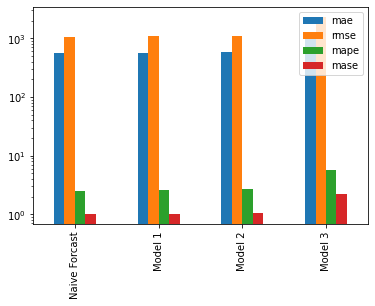

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'Naive Forcast': naive_results,
                   'Model 1': model_1_results,
                   'Model 2': model_2_results,
                   'Model 3': model_3_results}).T
df = df.drop('mse', 1)
df.plot(kind='bar', logy=True)

#Model 4: Conv1D model (window = 7, horizon = 1)

In [ ]:
WIN_SIZE = 7
HORIZON = 1

In [ ]:
full_windows, full_labels = make_windows(price_list, window_size=WIN_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
expand_dim_layer(train_windows[0])

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [ ]:
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name='model_4_conv1D')

In [ ]:
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
history_4 = model_4.fit(train_windows, train_labels,
                        validation_data=(test_windows, test_labels),
                        epochs=100, batch_size=128,
                        callbacks=[create_model_checkpoint(model_4.name)])

In [ ]:
model_4.load_weights("model_checkpoints/model_4_conv1D")
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 5ms/step - loss: 566.6888 - mae: 566.6888 - mse: 1172699.5000


[566.6888427734375, 566.6888427734375, 1172699.5]

In [ ]:
test_labels = tf.cast(test_labels, tf.float32)
test_labels = tf.squeeze(test_labels)

y_pred_4 = model_4.predict(test_windows)
y_pred_4 = tf.squeeze(y_pred_4)

In [ ]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels), 
                                 y_pred = tf.squeeze(y_pred_4))

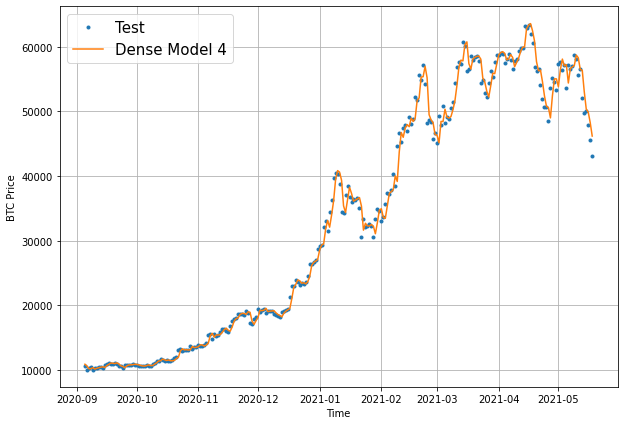

In [ ]:
offsoffset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_labels):], test_labels[:], start=offset, format='.', label='Test')
plot_time_series(X_test[-len(test_labels):], y_pred_4, start=offset, format='-', label='Dense Model 4')

#Model 5: LSTM Model

In [ ]:
inputs = layers.Input(shape=(WIN_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs, outputs, name='model_5_LSTM')

In [ ]:
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
history_5 = model_5.fit(train_windows, train_labels,
                        validation_data=(test_windows, test_labels),
                        epochs=100, batch_size=128,
                        callbacks=[create_model_checkpoint(model_5.name)])

In [ ]:
model_5.load_weights("model_checkpoints/model_5_LSTM")
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 593.9558 - mae: 593.9558 - mse: 1258652.5000


[593.955810546875, 593.955810546875, 1258652.5]

In [ ]:
test_labels = tf.cast(test_labels, tf.float32)
test_labels = tf.squeeze(test_labels)

y_pred_5 = model_5.predict(test_windows)
y_pred_5 = tf.squeeze(y_pred_5)

In [ ]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels), 
                                 y_pred = tf.squeeze(y_pred_5))

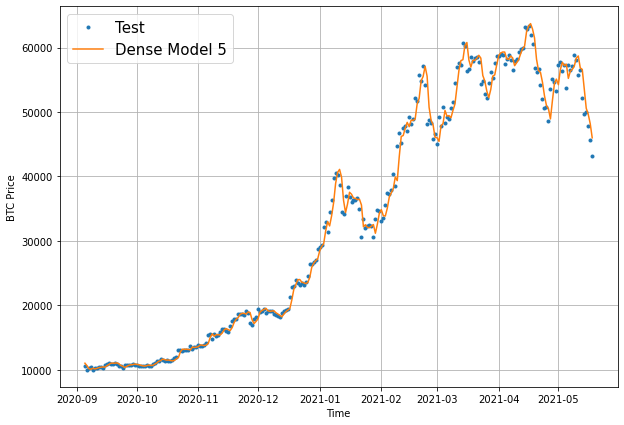

In [ ]:
offsoffset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_labels):], test_labels[:], start=offset, format='.', label='Test')
plot_time_series(X_test[-len(test_labels):], y_pred_5, start=offset, format='-', label='Dense Model 5')

#Create windowed data by pandas DataFrame shift

In [40]:
windowed_data_df = data_df.copy()

In [41]:
for i in range(WIN_SIZE):
  windowed_data_df[f'Price+{i+1}'] = windowed_data_df['Closing Price (USD)'].shift(periods=i+1, axis=0)
windowed_data_df = windowed_data_df.dropna()

In [42]:
windowed_data_df

,Closing Price (USD),Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990
2013-10-09,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000
2013-10-10,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830
2013-10-11,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660
2013-10-12,125.927500,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


#Model 6: Multivariate Model(Feature Engineering)

##Add new feature block reward

In [43]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [45]:
block_reward_2_days = (block_reward_3_datetime - windowed_data_df.index[0]).days
block_reward_3_days = (block_reward_4_datetime - windowed_data_df.index[0]).days

In [46]:
block_reward_2_days, block_reward_3_days

(1005, 2407)

In [49]:
windowed_data_df['block_reward'] = None

windowed_data_df.iloc[: block_reward_2_days, -1] = block_reward_2
windowed_data_df.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
windowed_data_df.iloc[block_reward_3_days:, -1] = block_reward_4

In [51]:
windowed_data_df

,Closing Price (USD),Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,block_reward
Date,,,,,,,,,
2013-10-08,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990,25
2013-10-09,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,25
2013-10-10,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,25
2013-10-11,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,25
2013-10-12,125.927500,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,25
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879,6.25
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,6.25
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,6.25


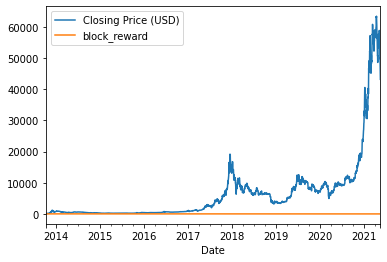

In [65]:
windowed_data_df.plot(y=['Closing Price (USD)', 'block_reward'])

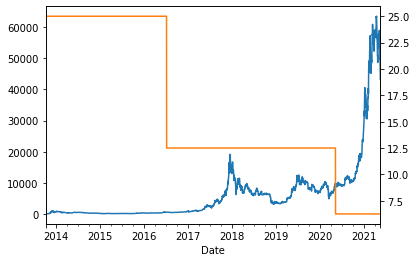

In [89]:
plt.figure()
windowed_data_df['Closing Price (USD)'].plot(label='Prices')
windowed_data_df['block_reward'].plot(secondary_y=True)
plt.show()

##Train, test split

In [108]:
full_windows = windowed_data_df.drop(['Closing Price (USD)', 'block_reward'], axis=1).astype(np.float32)
full_block_rewards = windowed_data_df['block_reward'].astype(np.float32)
full_labels = windowed_data_df['Closing Price (USD)'].astype(np.float32)

In [96]:
len(full_windows), len(full_labels)

(2780, 2780)

In [109]:
split_size = int(len(full_windows) * 0.8)

train_windows = full_windows[:split_size]
train_labels  = full_labels[:split_size]
train_block_rewards = full_block_rewards[:split_size]

test_windows = full_windows[split_size:]
test_labels  = full_labels[split_size:]
test_block_rewards = full_block_rewards[split_size:]

In [110]:
len(train_windows), len(test_windows)

(2224, 556)

In [111]:
train_windows.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2224 entries, 2013-10-08 to 2019-11-09
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price+1  2224 non-null   float32
 1   Price+2  2224 non-null   float32
 2   Price+3  2224 non-null   float32
 3   Price+4  2224 non-null   float32
 4   Price+5  2224 non-null   float32
 5   Price+6  2224 non-null   float32
 6   Price+7  2224 non-null   float32
dtypes: float32(7)
memory usage: 78.2 KB


##Build the model

In [121]:
price_inputs = layers.Input(shape=(7,), dtype=tf.float32)
price_outputs = layers.Dense(128, activation='relu')(price_inputs)
price_model = tf.keras.Model(price_inputs, price_outputs)

block_reward_inputs = layers.Input(shape=(1,), dtype=tf.float32)
block_reward_outputs = layers.Dense(32, activation='relu')(block_reward_inputs)
block_reward_model = tf.keras.Model(block_reward_inputs, block_reward_outputs)

concat_layer = layers.Concatenate()([price_model.output,
                                     block_reward_model.output])
output_layer = layers.Dense(1)(concat_layer)

model_6 = tf.keras.Model(inputs=[price_model.input,
                                 block_reward_model.input],
                         outputs=output_layer,
                         name='model_6_multi')

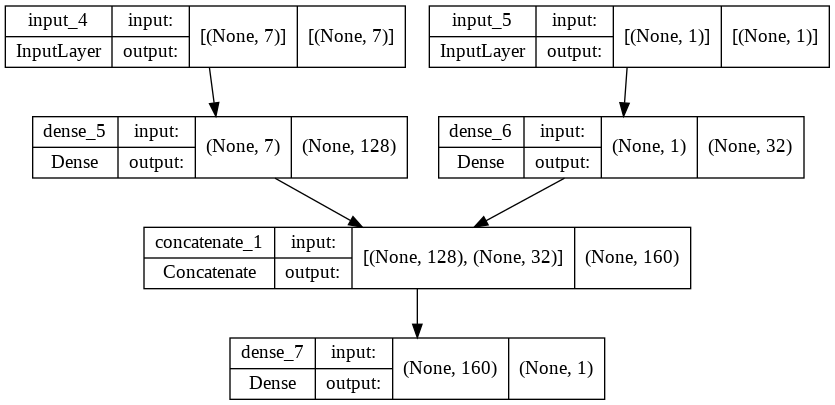

In [116]:
from tensorflow.keras.utils import plot_model
plot_model(model_6, show_shapes=True)

In [122]:
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
history_6 = model_6.fit((train_windows, train_block_rewards),
                        train_labels,
                        validation_data=((test_windows, test_block_rewards), test_labels),
                        epochs=100, batch_size=128,
                        callbacks=[create_model_checkpoint(model_6.name)])

In [124]:
model_6.load_weights("model_checkpoints/model_6_multi")
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])
model_6.evaluate((test_windows, test_block_rewards), test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 565.1095 - mae: 565.1095 - mse: 1156455.3750


[565.1094970703125, 565.1094970703125, 1156455.375]

In [125]:
test_labels = tf.squeeze(test_labels)

y_pred_6 = model_6.predict((test_windows, test_block_rewards))
y_pred_6 = tf.squeeze(y_pred_6)

In [127]:
model_6_results = evaluate_preds(y_true = tf.squeeze(test_labels), 
                                 y_pred = tf.squeeze(y_pred_6))
model_6_results

{'mae': 565.10944,
 'mape': 2.5221102,
 'mase': 0.99274075,
 'mse': 1156455.2,
 'rmse': 1075.3861}